In [2]:
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import plot_utils as pu
import utils
from data_utils import data_dic

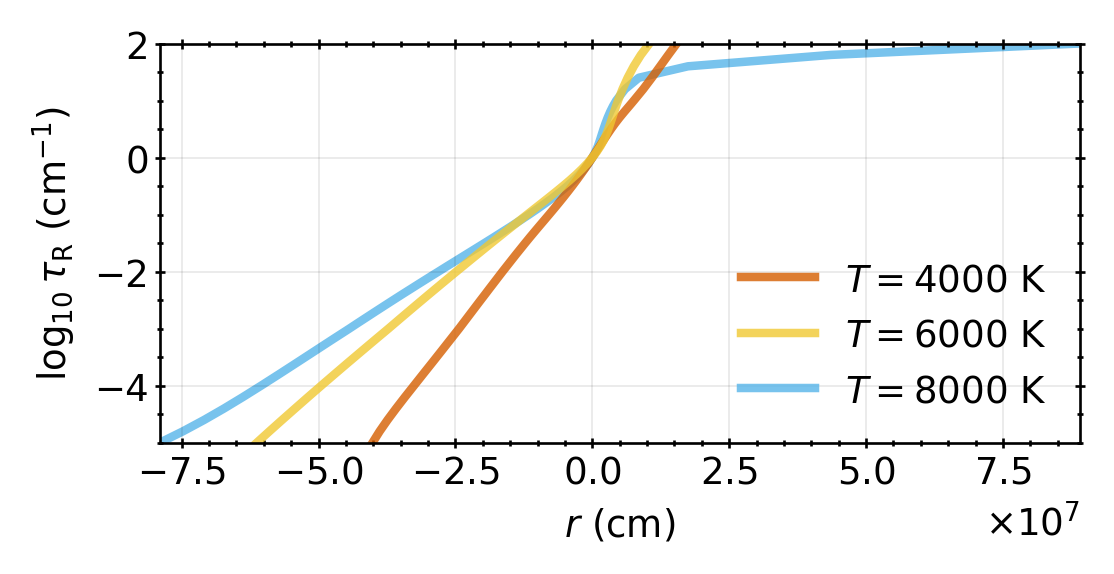

In [34]:
fig_size, rat = 540, 2
subplots = (1,1)
ts = 3.5
fig, axs, fs, gs = pu.initialize_figure(fig_size=fig_size, ratio=rat, subplots=subplots,
                                        ts=ts, sw=0.25)
ax = axs[0][0]

colors = [(213/255, 94/255, 0), (240/255, 200/255, 50/255), (86/255, 180/255, 233/255)]
labels = [f'$T = {t}$ K' for t in [4000,6000,8000]]
zorders = [2,2,1]
for i, data_el in enumerate(data_dic):
    data = data_dic[data_el]['data']
    r = data['Depth']
    igTaur = data['lgTauR']

    ax.plot(r, igTaur, label=labels[i], color=colors[i], lw=0.8*fs, zorder=zorders[i],
            alpha=0.8)

sts = 1
ax.set_xlabel(r'$r$ (cm)', fontsize=fs*ts*sts)
ax.set_ylabel(r'$\log_{10} \tau_{\rm R}$ (cm$^{-1}$)', fontsize=fs*ts*sts)

ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

offset_text = ax.get_xaxis().get_offset_text()
offset_text.set_fontsize(ts*fs)  # Adjust the font size as needed
offset_text.set_position((1, 1))

# set legend
ax.legend(loc='lower right', fontsize=fs*ts*sts, frameon=False)

ax.set_xlim(np.min(r), np.max(r))
ax.set_ylim(np.min(igTaur), np.max(igTaur))


savefold = '../figures/first_plots/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = f'r_lgTauR.png'
savepath1 = savefold + figname

fig.savefig(savepath1, dpi=300, bbox_inches='tight')


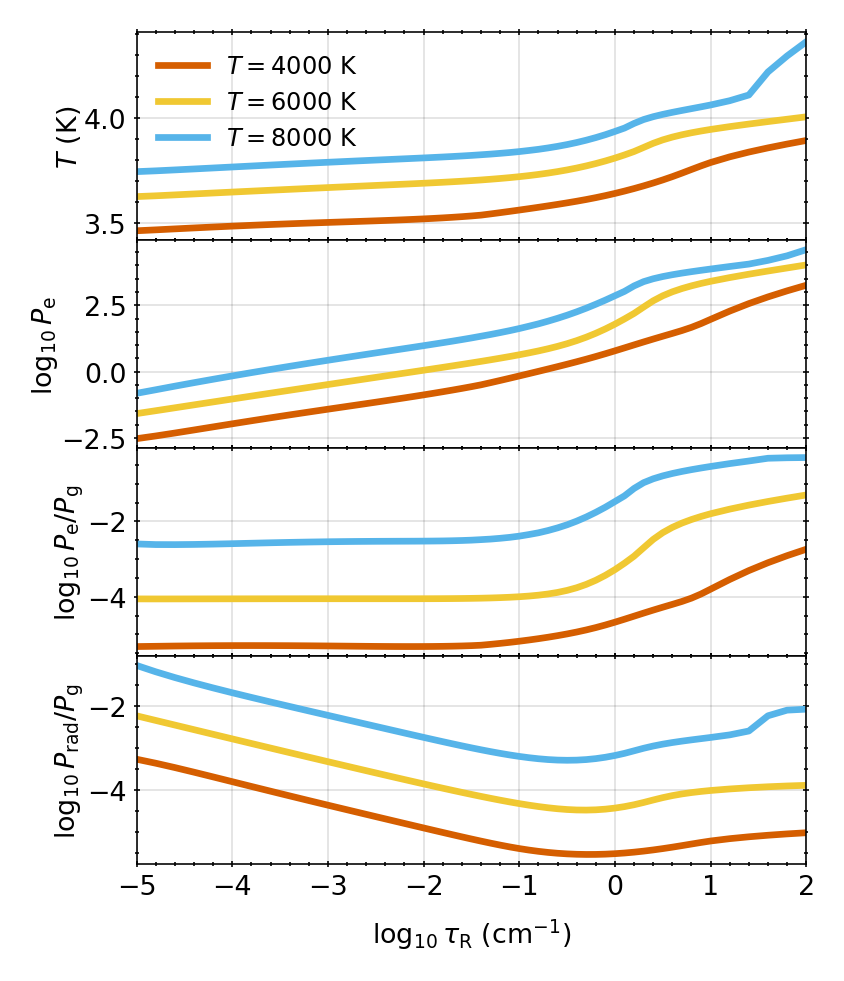

In [32]:
fig_size, rat, dpi = 1080, 0.8, 300
subplots = (4,1)
ts = 2
fig, axs, fs, gs = pu.initialize_figure(fig_size=fig_size, ratio=rat, subplots=subplots, dpi=dpi, 
                                        ts=ts, sw=0.12, hspace=0, layout='none')

# flatten axs
axs_ = [ax for axs_ in axs for ax in axs_]

colors = [(213/255, 94/255, 0), (240/255, 200/255, 50/255), (86/255, 180/255, 233/255)]
labels = [f'$T = {t}$ K' for t in [4000,6000,8000]]
y_labs = [r'$T$ (K)', r'$\log_{10}P_{\rm e}$', r'$\log_{10}P_{\rm e}/P_{\rm g}$', r'$\log_{10}P_{\rm rad}/P_{\rm g}$']
x_min, x_max = 0, 0
for i, data_el in enumerate(data_dic):
    data = data_dic[data_el]['data']
    igTaur = data['lgTauR']
    x_min = np.min(igTaur) if np.min(igTaur) < x_min else x_min
    x_max = np.max(igTaur) if np.max(igTaur) > x_max else x_max
    Pe = data['Pe']
    Pg = data['Pg']
    Prad = data['Prad']
    T = data['T']

    ys = [T, Pe, Pe/Pg, Prad/Pg]
    ys_log = [np.log10(y) for y in ys]


    for j, ax in enumerate(axs_):
        ax.plot(igTaur, ys_log[j], label=labels[i], color=colors[i], lw=0.5*fs)
        #ax.set_yscale('log')
        ax.set_xlim(x_min, x_max)
        #ax.set_ylim(np.min(), np.max(ys))

        # set y label
        sts = 1
        ax.set_ylabel(y_labs[j], fontsize=fs*ts*sts, labelpad=0.1*fs)
        
        if j!=3:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel(r'$\log_{10} \tau_{\rm R}$ (cm$^{-1}$)', fontsize=fs*ts*sts)


sts = 0.9
axs_[0].legend(loc='upper left', fontsize=fs*ts*sts, frameon=False)


x0, y0 = -0.01*rat*fig_size/dpi, -0.0*fig_size/dpi
x1, y1 = 0.93*rat*fig_size/dpi, 0.9*fig_size/dpi

savefold = '../figures/first_plots/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = f'lgTauR_vs_Ps.png'
savepath1 = savefold + figname

fig.savefig(savepath1, dpi=300, bbox_inches=mpl.transforms.Bbox([[x0, y0], [x1, y1]]))
